In [58]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [59]:
def hfn(li:list):
    main = []
    for i in li:
        main.append(list(i.split(":")))
    hr,min,sec = 0,0,0
    for i in main:
        hr += int(i[0])
        min += int(i[1])
        sec += int(i[2])
    min += sec//60
    sec = sec%60
    hr += min//60
    min = min%60
    days = hr//24
    hr = hr%24
    return f"{days} days {hr}:{min}:{sec}"

def mfn(li:list):
    main = []
    for i in li:
        main.append(list(i.split(":")))
    hr,min,sec = 0,0,0
    for i in main:
        # hr += int(i[0])
        min += int(i[0])
        sec += int(i[1])
    min+=sec//60
    sec=sec%60
    min=min//len(li)

    return f"{min}:{sec:02d}"
    # return f"{days} days {hr}:{min}:{sec}"

In [60]:
df = pd.read_csv("cleaned airline data.csv")


In [61]:
df.head()

,Flight_Number,Airline,Aircraft_Type,Origin,Destination,Date,Distance_km,Duration_hours,Ticket_Price,Fuel_Cost,Weather_Condition,Delay_minutes,Passenger_Count
0,8498,SpiceJet,ATR72,CCU,MAA,2023-06-12,1384.0,03:05:60,2963.516704,3828.490167,Cloudy,000:000,62
1,5263,IndiGo,A320,AMD,PNQ,2023-09-21,519.0,01:06:60,2912.486246,1790.502002,Cloudy,027:054,119
2,1877,GoAir,B737,CCU,DEL,2023-11-30,1423.0,02:06:60,2177.869901,5122.704201,Cloudy,026:020,122
3,1598,GoAir,B737,AMD,HYD,2023-06-30,907.0,01:30:60,2204.381503,3289.369504,Cloudy,013:046,143
4,2722,GoAir,ATR72,HYD,PNQ,2023-10-24,529.0,01:43:00,2321.112931,1543.099700,Clear,018:055,40


In [62]:
air = df["Airline"].unique().tolist()
can_airline = df[df["Distance_km"]==0.0].groupby("Airline")["Flight_Number"].count().to_dict()
depar_airline = df[df["Distance_km"]!=0.0].groupby("Airline")["Flight_Number"].count().to_dict()
arr_timely = df[df["Delay_minutes"].isin([f"000:{i:03d}" for i in range(60)])].groupby("Airline")["Flight_Number"].count().to_dict()
temp = df.groupby("Airline")["Delay_minutes"].count().to_dict()
arr_delay = {k: temp[k]-arr_timely.get(k,0) for k in temp.keys()}
arr_profit = {k: df[(df["Airline"]==k)]["Ticket_Price"].sum() - df[(df["Airline"]==k)]["Fuel_Cost"].sum() for k in air}
arr_pass_count = df[df["Distance_km"]!=0.0].groupby("Airline")["Passenger_Count"].sum().to_dict()
flt_toff_cnt = {m:[[q, list(n.values()).count(q)] for q in list(set(n.values()))] 
                for m,n in {i: df[(df["Airline"]==i) & (df["Distance_km"]!=0.0)]["Flight_Number"].value_counts().to_dict() 
                            for i in df["Airline"].unique()}.items()}


In [63]:
arr_timely

{'Air India': 3842,
 'GoAir': 3806,
 'IndiGo': 3788,
 'SpiceJet': 3810,
 'Vistara': 3773}

In [64]:
# data regarding aircraft_type
can_at = {i:df[(df["Distance_km"]==0.0)&
               (df["Airline"]==i)].groupby("Aircraft_Type")
               ["Flight_Number"].count().to_dict()
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().items()}
depart_at = {i:df[(df["Distance_km"]!=0.0)&
                  (df["Airline"]==i)].groupby("Aircraft_Type")
               ["Flight_Number"].count().to_dict()
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().items()}
org_at = {i:{k:df[(df["Aircraft_Type"]==k)&
               (df["Airline"]==i)].groupby("Origin")
               ["Flight_Number"].count().to_dict()
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}
dest_at = {i:{k:df[(df["Aircraft_Type"]==k)&
               (df["Airline"]==i)].groupby("Destination")
               ["Flight_Number"].count().to_dict()
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}
flight_time=a={i:{k:hfn(df[(df["Airline"]==i) & 
            (df["Aircraft_Type"]==k) & 
            (df["Distance_km"]!=0.0)]["Duration_hours"].tolist())
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}
at_pass_t={i:{k:[int(df[(df["Airline"]==i) & 
            (df["Aircraft_Type"]==k) & 
            (df["Distance_km"]!=0.0)]["Passenger_Count"].sum()),
            int(df[(df["Airline"]==i) & 
            (df["Aircraft_Type"]==k) & 
            (df["Distance_km"]!=0.0)]["Passenger_Count"].mean())]
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}
at_profit = {i:{k:round(df[(df["Aircraft_Type"]==k)&
               (df["Airline"]==i)]["Ticket_Price"].sum() +
               df[(df["Aircraft_Type"]==k)&
               (df["Airline"]==i)]["Fuel_Cost"].sum(),2)
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}
at_delay={i:{k:[df[(df["Airline"]==i) & 
            (df["Aircraft_Type"]==k) & 
            (df["Distance_km"]!=0.0)]["Flight_Number"].count(),
            mfn(df[(df["Airline"]==i) & 
            (df["Aircraft_Type"]==k) & 
            (df["Distance_km"]!=0.0)]["Delay_minutes"].tolist())]
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}


In [65]:
can_airline

{'Air India': 2569,
 'GoAir': 2461,
 'IndiGo': 2516,
 'SpiceJet': 2539,
 'Vistara': 2562}

In [66]:
depar_airline

{'Air India': 17655,
 'GoAir': 17513,
 'IndiGo': 17446,
 'SpiceJet': 17368,
 'Vistara': 17371}

In [67]:
arr_delay

{'Air India': 16382,
 'GoAir': 16168,
 'IndiGo': 16174,
 'SpiceJet': 16097,
 'Vistara': 16160}

In [68]:
df["Aircraft_Type"].unique().tolist()

['ATR72', 'A320', 'B737', 'A321', 'B777']

In [69]:
arr_profit

{'SpiceJet': -6371306.398718663,
 'IndiGo': 64326.90669515729,
 'GoAir': -13473873.926565394,
 'Air India': 6801489.452154696,
 'Vistara': 20048972.92076406}

In [70]:
can_at

{'Air India': {'A320': 506,
  'A321': 515,
  'ATR72': 552,
  'B737': 469,
  'B777': 527},
 'GoAir': {'A320': 486, 'A321': 514, 'ATR72': 468, 'B737': 502, 'B777': 491},
 'IndiGo': {'A320': 507, 'A321': 508, 'ATR72': 505, 'B737': 504, 'B777': 492},
 'SpiceJet': {'A320': 479,
  'A321': 493,
  'ATR72': 554,
  'B737': 511,
  'B777': 502},
 'Vistara': {'A320': 489, 'A321': 475, 'ATR72': 560, 'B737': 549, 'B777': 489}}

In [71]:
org_at = {i:{k:df[(df["Aircraft_Type"]==k)&
               (df["Airline"]==i)].groupby("Origin")
               ["Flight_Number"].count().to_dict()
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}

In [72]:
org_at

{'Air India': {'B777': {'AMD': 500,
   'BLR': 488,
   'BOM': 533,
   'CCU': 504,
   'DEL': 511,
   'HYD': 515,
   'MAA': 488,
   'PNQ': 488},
  'ATR72': {'AMD': 528,
   'BLR': 463,
   'BOM': 499,
   'CCU': 531,
   'DEL': 481,
   'HYD': 553,
   'MAA': 474,
   'PNQ': 525},
  'A320': {'AMD': 531,
   'BLR': 530,
   'BOM': 473,
   'CCU': 488,
   'DEL': 512,
   'HYD': 482,
   'MAA': 500,
   'PNQ': 518},
  'B737': {'AMD': 492,
   'BLR': 506,
   'BOM': 498,
   'CCU': 545,
   'DEL': 513,
   'HYD': 517,
   'MAA': 486,
   'PNQ': 505},
  'A321': {'AMD': 457,
   'BLR': 480,
   'BOM': 535,
   'CCU': 526,
   'DEL': 509,
   'HYD': 490,
   'MAA': 552,
   'PNQ': 498}},
 'GoAir': {'B737': {'AMD': 535,
   'BLR': 488,
   'BOM': 513,
   'CCU': 478,
   'DEL': 468,
   'HYD': 487,
   'MAA': 535,
   'PNQ': 498},
  'ATR72': {'AMD': 459,
   'BLR': 493,
   'BOM': 485,
   'CCU': 478,
   'DEL': 493,
   'HYD': 490,
   'MAA': 482,
   'PNQ': 524},
  'A320': {'AMD': 543,
   'BLR': 533,
   'BOM': 527,
   'CCU': 500,
   '

In [73]:
dest_at = {i:{k:df[(df["Aircraft_Type"]==k)&
               (df["Airline"]==i)].groupby("Destination")
               ["Flight_Number"].count().to_dict()
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}

In [74]:
dest_at

{'Air India': {'B777': {'AMD': 542,
   'BLR': 512,
   'BOM': 462,
   'CCU': 528,
   'DEL': 488,
   'HYD': 497,
   'MAA': 482,
   'PNQ': 516},
  'ATR72': {'AMD': 499,
   'BLR': 487,
   'BOM': 484,
   'CCU': 528,
   'DEL': 522,
   'HYD': 510,
   'MAA': 496,
   'PNQ': 528},
  'A320': {'AMD': 535,
   'BLR': 500,
   'BOM': 487,
   'CCU': 524,
   'DEL': 482,
   'HYD': 516,
   'MAA': 491,
   'PNQ': 499},
  'B737': {'AMD': 554,
   'BLR': 500,
   'BOM': 490,
   'CCU': 530,
   'DEL': 475,
   'HYD': 490,
   'MAA': 523,
   'PNQ': 500},
  'A321': {'AMD': 541,
   'BLR': 495,
   'BOM': 491,
   'CCU': 510,
   'DEL': 477,
   'HYD': 497,
   'MAA': 525,
   'PNQ': 511}},
 'GoAir': {'B737': {'AMD': 479,
   'BLR': 494,
   'BOM': 521,
   'CCU': 500,
   'DEL': 502,
   'HYD': 513,
   'MAA': 500,
   'PNQ': 493},
  'ATR72': {'AMD': 509,
   'BLR': 484,
   'BOM': 484,
   'CCU': 461,
   'DEL': 504,
   'HYD': 494,
   'MAA': 483,
   'PNQ': 485},
  'A320': {'AMD': 515,
   'BLR': 500,
   'BOM': 529,
   'CCU': 534,
   '

In [75]:
air_at = {i:df[(df["Airline"]==i) & (df["Distance_km"]!=0.0)].groupby("Aircraft_Type")["Flight_Number"].count().to_dict() for i in air}

In [76]:
air_at

{'SpiceJet': {'A320': 3520,
  'A321': 3490,
  'ATR72': 3516,
  'B737': 3470,
  'B777': 3372},
 'IndiGo': {'A320': 3470,
  'A321': 3479,
  'ATR72': 3597,
  'B737': 3365,
  'B777': 3535},
 'GoAir': {'A320': 3641,
  'A321': 3401,
  'ATR72': 3436,
  'B737': 3500,
  'B777': 3535},
 'Air India': {'A320': 3528,
  'A321': 3532,
  'ATR72': 3502,
  'B737': 3593,
  'B777': 3500},
 'Vistara': {'A320': 3397,
  'A321': 3492,
  'ATR72': 3454,
  'B737': 3462,
  'B777': 3566}}

In [77]:
flight_time=a={i:{k:hfn(df[(df["Airline"]==i) & 
            (df["Aircraft_Type"]==k) & 
            (df["Distance_km"]!=0.0)]["Duration_hours"].tolist())
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}

In [78]:
flight_time

{'Air India': {'B777': '242 days 11:46:0',
  'ATR72': '381 days 21:30:0',
  'A320': '255 days 12:5:0',
  'B737': '262 days 17:40:0',
  'A321': '253 days 22:47:0'},
 'GoAir': {'B737': '255 days 10:33:0',
  'ATR72': '371 days 8:16:0',
  'A320': '264 days 8:13:0',
  'A321': '243 days 2:44:0',
  'B777': '246 days 4:34:0'},
 'IndiGo': {'A320': '252 days 22:34:0',
  'B777': '244 days 7:17:0',
  'B737': '246 days 9:35:0',
  'A321': '250 days 2:1:0',
  'ATR72': '387 days 15:15:0'},
 'SpiceJet': {'ATR72': '376 days 6:29:0',
  'A321': '251 days 10:32:0',
  'A320': '255 days 3:26:0',
  'B777': '234 days 5:59:0',
  'B737': '252 days 10:10:0'},
 'Vistara': {'B777': '246 days 16:49:0',
  'A320': '247 days 12:21:0',
  'B737': '253 days 8:54:0',
  'A321': '250 days 19:5:0',
  'ATR72': '369 days 23:15:0'}}

In [79]:
at_pass_t={i:{k:[int(df[(df["Airline"]==i) & 
            (df["Aircraft_Type"]==k) & 
            (df["Distance_km"]!=0.0)]["Passenger_Count"].sum()),
            int(df[(df["Airline"]==i) & 
            (df["Aircraft_Type"]==k) & 
            (df["Distance_km"]!=0.0)]["Passenger_Count"].mean())]
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}

In [80]:
at_pass_t

{'Air India': {'B777': [914245, 261],
  'ATR72': [181645, 51],
  'A320': [472104, 133],
  'B737': [468971, 130],
  'A321': [580391, 164]},
 'GoAir': {'B737': [455618, 130],
  'ATR72': [178557, 51],
  'A320': [488507, 134],
  'A321': [558929, 164],
  'B777': [926036, 261]},
 'IndiGo': {'A320': [466351, 134],
  'B777': [923433, 261],
  'B737': [439322, 130],
  'A321': [571093, 164],
  'ATR72': [186375, 51]},
 'SpiceJet': {'ATR72': [181602, 51],
  'A321': [573378, 164],
  'A320': [472730, 134],
  'B777': [880036, 260],
  'B737': [451928, 130]},
 'Vistara': {'B777': [932241, 261],
  'A320': [459189, 135],
  'B737': [451814, 130],
  'A321': [572956, 164],
  'ATR72': [179258, 51]}}

In [81]:
at_profit = {i:{k:round(df[(df["Aircraft_Type"]==k)&
               (df["Airline"]==i)]["Ticket_Price"].sum() +
               df[(df["Aircraft_Type"]==k)&
               (df["Airline"]==i)]["Fuel_Cost"].sum(),2)
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}

In [82]:
at_profit

{'Air India': {'B777': 31759535.2,
  'ATR72': 24651043.25,
  'A320': 27150815.28,
  'B737': 27916031.34,
  'A321': 30205090.92},
 'GoAir': {'B737': 23538394.21,
  'ATR72': 20115966.86,
  'A320': 24030579.15,
  'A321': 24798924.81,
  'B777': 27635487.01},
 'IndiGo': {'A320': 25622158.24,
  'B777': 30356434.0,
  'B737': 25182607.75,
  'A321': 28345469.19,
  'ATR72': 23664784.94},
 'SpiceJet': {'ATR72': 21942769.14,
  'A321': 26957454.62,
  'A320': 24523360.39,
  'B777': 27813367.81,
  'B737': 24583472.59},
 'Vistara': {'B777': 35060252.08,
  'A320': 28747189.32,
  'B737': 29807254.68,
  'A321': 32592872.72,
  'ATR72': 26654607.24}}

In [83]:
at_delay={i:{k:[df[(df["Airline"]==i) & 
            (df["Aircraft_Type"]==k) & 
            (df["Distance_km"]!=0.0)]["Flight_Number"].count(),
            mfn(df[(df["Airline"]==i) & 
            (df["Aircraft_Type"]==k) & 
            (df["Distance_km"]!=0.0)]["Delay_minutes"].tolist())]
               for k in j}
               for i,j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()}

In [84]:
at_delay

{'Air India': {'B777': [3500, '22:30'],
  'ATR72': [3502, '22:35'],
  'A320': [3528, '21:28'],
  'B737': [3593, '22:31'],
  'A321': [3532, '22:09']},
 'GoAir': {'B737': [3500, '22:09'],
  'ATR72': [3436, '22:42'],
  'A320': [3641, '22:58'],
  'A321': [3401, '22:10'],
  'B777': [3535, '22:22']},
 'IndiGo': {'A320': [3470, '21:53'],
  'B777': [3535, '22:16'],
  'B737': [3365, '22:20'],
  'A321': [3479, '22:56'],
  'ATR72': [3597, '22:19']},
 'SpiceJet': {'ATR72': [3516, '21:33'],
  'A321': [3490, '22:15'],
  'A320': [3520, '22:57'],
  'B777': [3372, '21:18'],
  'B737': [3470, '22:15']},
 'Vistara': {'B777': [3566, '22:51'],
  'A320': [3397, '22:02'],
  'B737': [3462, '22:02'],
  'A321': [3492, '22:58'],
  'ATR72': [3454, '21:53']}}

In [85]:
flt_toff_cnt={m:[[q,list(n.values()).count(q)] for q in list(set(n.values()))] 
            for m,n in{i:df[(df["Airline"]== i) & (df["Distance_km"]!=0.0)]
             ["Flight_Number"].value_counts().to_dict() 
             for i in df["Airline"].unique()}.items()}
    

In [86]:
flt_toff_cnt

{'SpiceJet': [[1, 2485],
  [2, 2483],
  [3, 1518],
  [4, 778],
  [5, 292],
  [6, 90],
  [7, 24],
  [8, 8],
  [9, 1],
  [10, 1]],
 'IndiGo': [[1, 2475],
  [2, 2507],
  [3, 1543],
  [4, 730],
  [5, 299],
  [6, 117],
  [7, 25],
  [8, 1],
  [9, 2],
  [10, 1]],
 'GoAir': [[1, 2458],
  [2, 2459],
  [3, 1591],
  [4, 787],
  [5, 269],
  [6, 101],
  [7, 31],
  [8, 6]],
 'Air India': [[1, 2490],
  [2, 2444],
  [3, 1618],
  [4, 757],
  [5, 298],
  [6, 82],
  [7, 44],
  [8, 12],
  [9, 1]],
 'Vistara': [[1, 2559],
  [2, 2442],
  [3, 1545],
  [4, 714],
  [5, 312],
  [6, 97],
  [7, 34],
  [8, 6],
  [9, 1]]}

In [87]:
arr_timely

{'Air India': 3842,
 'GoAir': 3806,
 'IndiGo': 3788,
 'SpiceJet': 3810,
 'Vistara': 3773}

In [88]:
# def fn2(li: list):
#     total_seconds = 0
#     for s in li:
#         if pd.isna(s) or s is None or s == "":
#             continue
#         st = str(s)
#         # handle pandas Timedelta if present
#         if hasattr(s, "total_seconds"):
#             total_seconds += int(s.total_seconds())
#             continue
#         # handle "X days hh:mm:ss" or "hh:mm:ss" formats
#         if "days" in st:
#             days_part, time_part = st.split("days")
#             days = int(days_part.strip())
#             time_part = time_part.strip()
#         elif "day" in st:  # handle singular 'day'
#             days_part, time_part = st.split("day")
#             days = int(days_part.strip())
#             time_part = time_part.strip()
#         else:
#             days = 0
#             time_part = st
#         parts = time_part.split(":")
#         try:
#             if len(parts) == 3:
#                 hh, mm, ss = map(int, parts)
#             elif len(parts) == 2:
#                 hh = 0
#                 mm, ss = map(int, parts)
#             else:
#                 # unexpected format -> skip
#                 continue
#         except ValueError:
#             continue
#         total_seconds += ((days * 24 + hh) * 3600 + mm * 60 + ss)

#     days = total_seconds // 86400
#     rem = total_seconds % 86400
#     hr = rem // 3600
#     rem = rem % 3600
#     minute = rem // 60
#     sec = rem % 60
#     return f"{days} days {hr}:{minute}:{sec}"

# flight_time = {
#     i: {
#         k: fn2(
#             df[
#                 (df["Airline"] == i)
#                 & (df["Aircraft_Type"] == k)
#                 & (df["Distance_km"] != 0.0)
#             ]["Duration_hours"].tolist()
#         )
#         for k in j
#     }
#     for i, j in df.groupby("Airline")["Aircraft_Type"].unique().to_dict().items()
# }

In [89]:
# flight_time

In [90]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

monthly_flight_count = {
    month: {
        day: df[
            (df["Date"].dt.month == month) &
            (df["Date"].dt.day == day) &
            (df["Distance_km"] != 0.0)
        ]["Flight_Number"].count()
        for day in df[df["Date"].dt.month == month]["Date"].dt.day.unique().tolist()
    }
    for month in df["Date"].dt.month.unique().tolist()
}


monthly_flight_canceled = {
    month: {
        day: df[
            (df["Date"].dt.month == month) &
            (df["Date"].dt.day == day) &
            (df["Distance_km"] == 0.0)
        ]["Flight_Number"].count()
        for day in df[df["Date"].dt.month == month]["Date"].dt.day.unique().tolist()
    }
    for month in df["Date"].dt.month.unique().tolist()}

In [91]:
monthly_flight_canceled

{6: {12: 27,
  30: 41,
  16: 30,
  9: 32,
  10: 32,
  3: 23,
  28: 37,
  7: 40,
  27: 33,
  15: 30,
  29: 31,
  13: 32,
  21: 28,
  24: 37,
  23: 31,
  2: 27,
  26: 42,
  18: 30,
  20: 36,
  11: 48,
  5: 30,
  25: 31,
  22: 33,
  17: 41,
  19: 29,
  1: 29,
  14: 31,
  8: 24,
  4: 22,
  6: 25},
 9: {21: 21,
  11: 33,
  6: 28,
  2: 37,
  4: 23,
  28: 37,
  17: 40,
  10: 43,
  20: 31,
  30: 32,
  29: 36,
  13: 39,
  12: 35,
  24: 42,
  23: 28,
  15: 34,
  1: 43,
  26: 25,
  7: 30,
  8: 29,
  18: 26,
  27: 39,
  3: 32,
  16: 33,
  19: 36,
  14: 36,
  5: 35,
  9: 32,
  25: 38,
  22: 39},
 11: {30: 44,
  6: 30,
  25: 31,
  16: 32,
  1: 34,
  9: 28,
  11: 30,
  18: 26,
  7: 40,
  10: 40,
  20: 33,
  5: 27,
  14: 33,
  24: 39,
  29: 40,
  3: 25,
  27: 35,
  21: 46,
  4: 40,
  12: 35,
  26: 39,
  2: 23,
  19: 34,
  13: 30,
  22: 24,
  15: 39,
  23: 40,
  17: 34,
  28: 28,
  8: 36},
 10: {24: 35,
  19: 29,
  22: 33,
  18: 29,
  13: 34,
  21: 38,
  3: 48,
  7: 34,
  9: 35,
  27: 41,
  29: 29,
  8

In [92]:
df["Duration_hours"].max()

'04:20:60'

In [93]:
# {
#     month: {
#         day: df[
#             (df["Date"].dt.month == month) &
#             (df["Date"].dt.day == day) &
#             (df["Distance_km"] == 0.0)
#         ]["Flight_Number"].count()
#         for day in df[df["Date"].dt.month == month]["Date"].dt.day.unique().tolist()
#     }
#     for month in df["Date"].dt.month.unique().tolist()}
  
{ i: df[df["Airline"] == i]["Date"].dt.month.unique().tolist() for i in df["Airline"].unique().tolist() }

{'SpiceJet': [6, 2, 4, 8, 12, 11, 10, 3, 5, 9, 1, 7],
 'IndiGo': [9, 2, 8, 12, 5, 7, 4, 6, 10, 3, 11, 1],
 'GoAir': [11, 6, 10, 12, 3, 7, 1, 5, 8, 2, 9, 4],
 'Air India': [2, 3, 4, 9, 1, 7, 5, 6, 8, 11, 10, 12],
 'Vistara': [4, 8, 5, 2, 11, 3, 6, 1, 12, 7, 10, 9]}

In [94]:
{
    i: {
        month: df[(df["Airline"] == i) & (df["Date"].dt.month == month)]["Date"].dt.day.unique().tolist()
        for month in df[df["Airline"] == i]["Date"].dt.month.unique()
    }
    for i in df["Airline"].unique()
}


{'SpiceJet': {6: [12,
   16,
   9,
   24,
   2,
   18,
   23,
   20,
   22,
   7,
   11,
   19,
   10,
   14,
   8,
   21,
   3,
   17,
   4,
   28,
   1,
   30,
   25,
   13,
   29,
   27,
   5,
   6,
   26,
   15],
  2: [23,
   16,
   9,
   22,
   19,
   14,
   8,
   15,
   27,
   3,
   6,
   26,
   24,
   21,
   7,
   25,
   12,
   17,
   10,
   13,
   28,
   4,
   20,
   1,
   5,
   11,
   18,
   2],
  4: [27,
   3,
   12,
   23,
   8,
   17,
   6,
   16,
   13,
   29,
   11,
   28,
   7,
   14,
   9,
   4,
   15,
   5,
   2,
   20,
   19,
   1,
   24,
   22,
   10,
   25,
   26,
   30,
   18,
   21],
  8: [10,
   12,
   24,
   14,
   30,
   22,
   27,
   16,
   23,
   29,
   6,
   11,
   21,
   8,
   13,
   4,
   17,
   2,
   19,
   18,
   31,
   1,
   20,
   5,
   7,
   9,
   28,
   25,
   26,
   3,
   15],
  12: [8,
   18,
   24,
   14,
   9,
   2,
   26,
   16,
   4,
   21,
   17,
   12,
   20,
   29,
   28,
   23,
   22,
   30,
   1,
   13,
   6,
   19,
   25,
   10,
   27,
  

In [95]:

passenger_count={
    i: {
        month: {
            day: int(df[
                (df["Airline"] == i) &
                (df["Date"].dt.month == month) &
                (df["Date"].dt.day == day)
            ]["Passenger_Count"].sum())
            for day in df[
                (df["Airline"] == i) & 
                (df["Date"].dt.month == month)
            ]["Date"].dt.day.unique()
        }
        for month in df[df["Airline"] == i]["Date"].dt.month.unique()
    }
    for i in df["Airline"].unique()
}



In [96]:
passenger_count

{'SpiceJet': {6: {12: 6517,
   16: 8135,
   9: 7837,
   24: 8227,
   2: 9775,
   18: 6671,
   23: 6569,
   20: 6644,
   22: 7704,
   7: 10328,
   11: 6846,
   19: 9089,
   10: 7553,
   14: 10665,
   8: 6266,
   21: 7307,
   3: 7445,
   17: 8860,
   4: 7651,
   28: 7077,
   1: 8343,
   30: 8965,
   25: 7741,
   13: 5324,
   29: 6483,
   27: 7701,
   5: 9151,
   6: 7972,
   26: 9815,
   15: 8144},
  2: {23: 10329,
   16: 7590,
   9: 8082,
   22: 7944,
   19: 6905,
   14: 7577,
   8: 10299,
   15: 7369,
   27: 8141,
   3: 7857,
   6: 7935,
   26: 7603,
   24: 6847,
   21: 6328,
   7: 6265,
   25: 7104,
   12: 6508,
   17: 7756,
   10: 7135,
   13: 7192,
   28: 9246,
   4: 7885,
   20: 8271,
   1: 7903,
   5: 5808,
   11: 7317,
   18: 6101,
   2: 6713},
  4: {27: 7612,
   3: 7556,
   12: 7798,
   23: 8410,
   8: 4792,
   17: 7816,
   6: 8235,
   16: 8821,
   13: 7695,
   29: 7386,
   11: 6869,
   28: 8975,
   7: 8910,
   14: 8790,
   9: 7840,
   4: 9367,
   15: 6381,
   5: 8281,
   2: 7033

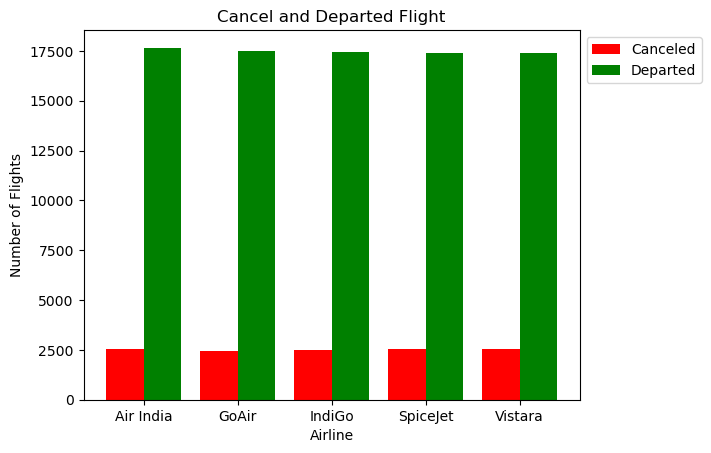

In [97]:
data={i:[j,depar_airline[i]] for i,j in can_airline.items()}
a=list(data.keys())
g1=[j[0]for j in data.values()]
g2=[j[1]for j in data.values()]
x=np.arange(len(a))
plt.bar(x-0.2,g1,0.4,color="red",label="Canceled")
plt.bar(x+0.2,g2,0.4,color="green",label="Departed")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.title("Cancel and Departed Flight")
plt.xlabel("Airline")
plt.xticks(x,a)
plt.ylabel("Number of Flights")
plt.show()

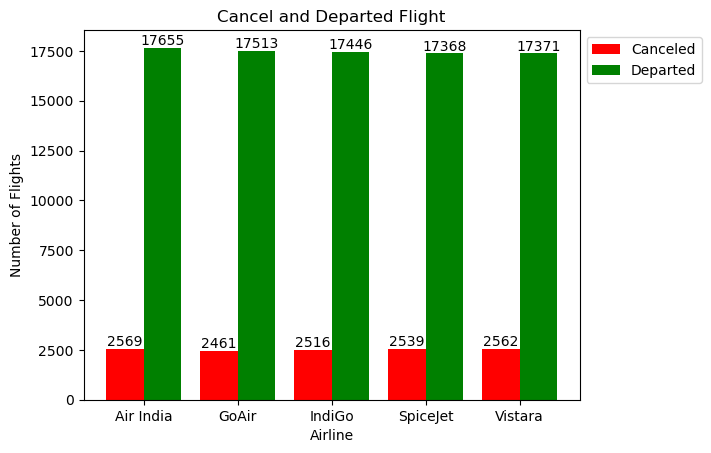

In [98]:
data={i:[j,depar_airline[i]] for i,j in can_airline.items()}
a=list(data.keys())
g1=[j[0]for j in data.values()]
g2=[j[1]for j in data.values()]
x=np.arange(len(a))
can=plt.bar(x-0.2,g1,0.4,color="red",label="Canceled")
dep=plt.bar(x+0.2,g2,0.4,color="green",label="Departed")
for i in [can,dep]:
    for j in i:
        h=j.get_height()
        plt.text(j.get_x()+j.get_width()/2,h,f"{h}",ha="center",va="bottom")
        # plt.annotate(f"{h:,}",xy=(j.get_x()+ j.get_width()/2,h/2),ha="center",va="center",fontsize=8,color="white",rotation=90)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.title("Cancel and Departed Flight")
plt.xlabel("Airline")
plt.xticks(x,a)
plt.ylabel("Number of Flights")
plt.show()

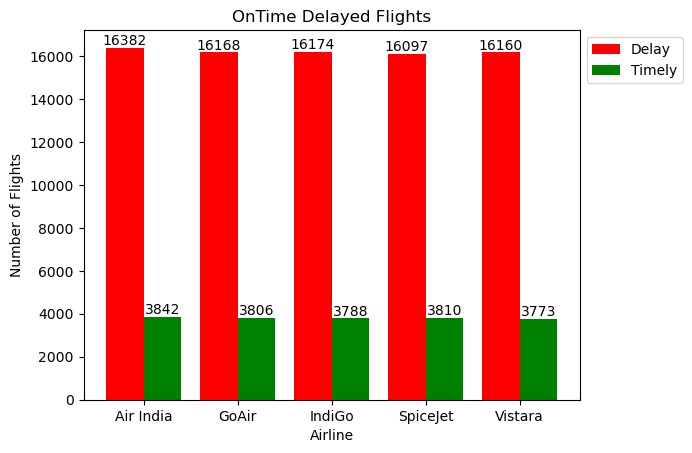

In [99]:
data={i:[j, arr_timely[i]] for i,j in arr_delay.items()}
a=list(data.keys())
g1=[j[0]for j in data.values()]
g2=[j[1]for j in data.values()]
x=np.arange(len(a))
can=plt.bar(x-0.2,g1,0.4,color="red",label="Delay")
dep=plt.bar(x+0.2,g2,0.4,color="green",label="Timely")
for i in [can,dep]:
    for j in i:
        h=j.get_height()
        plt.text(j.get_x()+j.get_width()/2,h,f"{h}",ha="center",va="bottom")
        # plt.annotate(f"{h:,}",xy=(j.get_x()+ j.get_width()/2,h/2),ha="center",va="center",fontsize=8,color="white",rotation=90)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.title("OnTime Delayed Flights")
plt.xlabel("Airline")
plt.xticks(x,a)
plt.ylabel("Number of Flights")
plt.show()

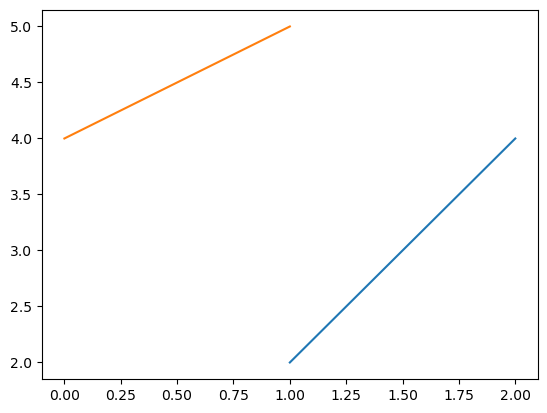

In [100]:
fig, ax=plt.subplots()
ax.plot([1,2],[2,4],[4,5])
plt.show()


# fig, ax=plt.subplots(4,3)

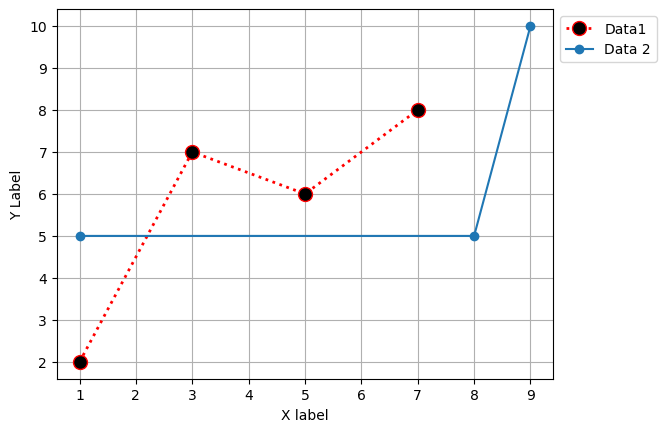

In [101]:
x=[1,3,5,7]                            #Line Plot
y=[2,7,6,8]
plt.plot(x,y,color="red",marker='o',markersize=10,linestyle=":",markerfacecolor="black",linewidth=2,label="Data1")
plt.xlabel("X label")
plt.ylabel("Y Label")
qw={1:5,8:5,9:10}
plt.plot(list(qw.keys()),list(qw.values()),marker='o',label="Data 2")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.grid()
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_34840\959108255.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(list(qw.keys()),list(qw.values()),c="green",marker="^",s=60,cmap="rainbow",label="Data2")


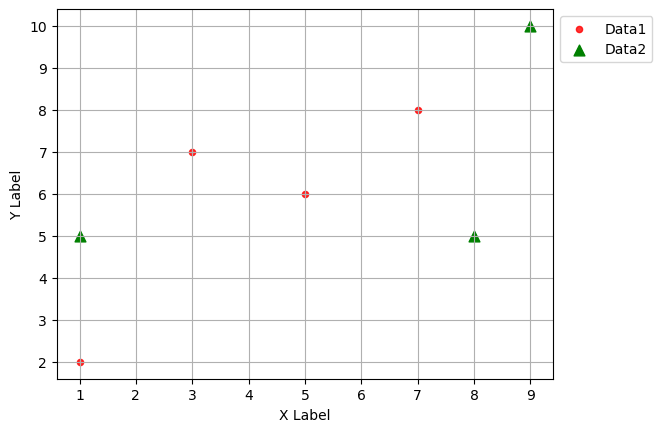

In [102]:
x=[1,3,5,7]                            #Scatter Graph
y=[2,7,6,8]
qw={1:5,8:5,9:10}
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.grid()
plt.scatter(x,y,c="red",s=20,marker='o',alpha=0.8,label="Data1")
plt.scatter(list(qw.keys()),list(qw.values()),c="green",marker="^",s=60,cmap="rainbow",label="Data2")
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()

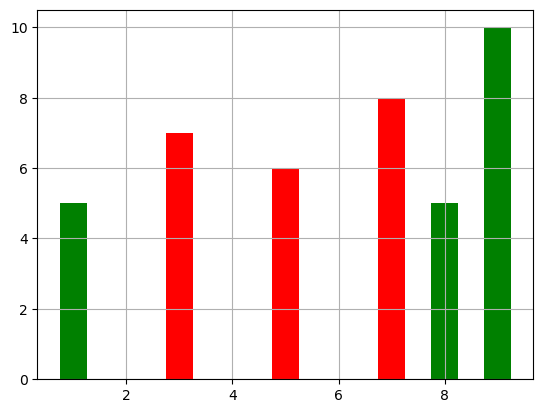

In [103]:
x=[1,3,5,7]                            #Bar graph
y=[2,7,6,8]
qw={1:5,8:5,9:10}
plt.bar(x,y,color="red",width=0.5,label="Data1")
plt.bar(list(qw.keys()),list(qw.values()),color="green",width=0.5,label="Data2")
plt.grid()
plt.show()

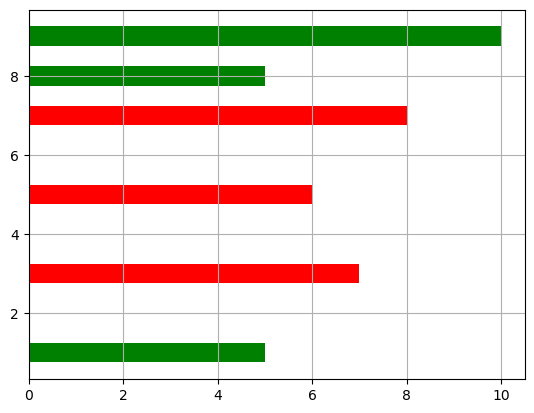

In [104]:
x=[1,3,5,7]                            #Histogram graph
y=[2,7,6,8]
qw={1:5,8:5,9:10}
plt.barh(x,y,color="red",height=0.5,label="Data1")
plt.barh(list(qw.keys()),list(qw.values()),color="green",height=0.5,label="Data2")
plt.grid()
plt.show()

(array([0.1, 0. , 0.2, 0.1]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. ]),
 <BarContainer object of 4 artists>)

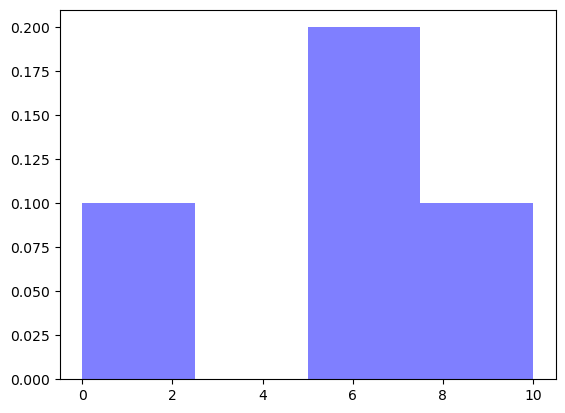

In [105]:
x=[1,3,5,7]                            #Histogram graph
y=[2,7,6,8]
plt.hist(y,bins=4,color="blue",alpha=0.5,density=True,range=(0,10),label="Data1")


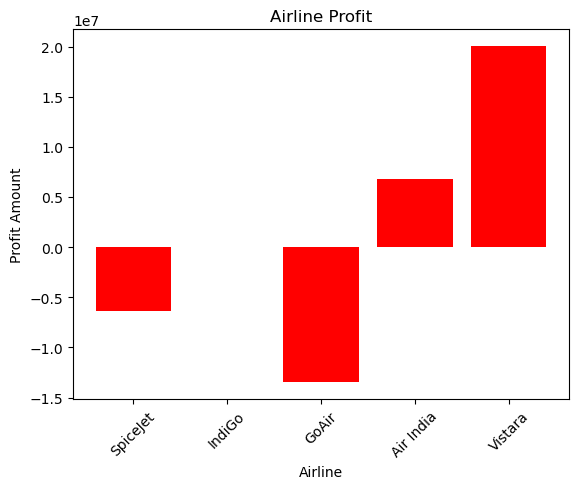

In [106]:
plt.bar(arr_profit.keys(), arr_profit.values(), color="red")
plt.title("Airline Profit")
plt.xlabel("Airline")
plt.ylabel("Profit Amount")
plt.xticks(rotation=45)
plt.show()

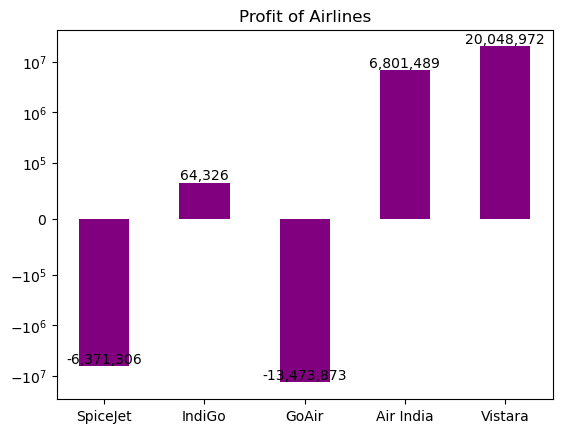

In [107]:
data = {i:int(j) for i,j in arr_profit.items()}
qwe = plt.bar(list(data.keys()), list(data.values()), color ="purple", width=0.5)
plt.yscale("symlog", linthresh=1e5)
for j in qwe:
    h = j.get_height()
    plt.text(j.get_x() + j.get_width()/2, h, f"{h:,}", ha='center', va='bottom')
plt.title("Profit of Airlines")
plt.show()

In [108]:
print(flt_toff_cnt)

{'SpiceJet': [[1, 2485], [2, 2483], [3, 1518], [4, 778], [5, 292], [6, 90], [7, 24], [8, 8], [9, 1], [10, 1]], 'IndiGo': [[1, 2475], [2, 2507], [3, 1543], [4, 730], [5, 299], [6, 117], [7, 25], [8, 1], [9, 2], [10, 1]], 'GoAir': [[1, 2458], [2, 2459], [3, 1591], [4, 787], [5, 269], [6, 101], [7, 31], [8, 6]], 'Air India': [[1, 2490], [2, 2444], [3, 1618], [4, 757], [5, 298], [6, 82], [7, 44], [8, 12], [9, 1]], 'Vistara': [[1, 2559], [2, 2442], [3, 1545], [4, 714], [5, 312], [6, 97], [7, 34], [8, 6], [9, 1]]}


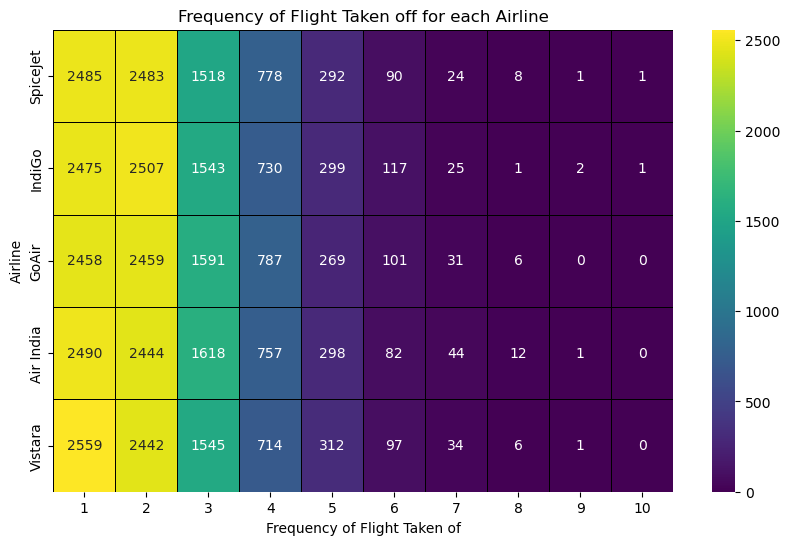

In [109]:
rs=[]
all=sorted({c for v in flt_toff_cnt.values() for c,_ in v})
for i,j in flt_toff_cnt.items():
    d={c:n for c,n in j}
    r={"Airline":i}
    for c in all:
        r[c]=d.get(c,0)
    rs.append(r)

df_ply=pd.DataFrame(rs).set_index("Airline")
plt.figure(figsize=(10,6))
sns.heatmap(df_ply,annot=True,fmt="d",cmap="viridis",linewidths=0.5,linecolor="black")
plt.title("Frequency of Flight Taken off for each Airline")
plt.xlabel("Frequency of Flight Taken of")
plt.show()

In [110]:
a=list(can_at.keys())
g1=list(list for j in can_at.values())
g1


# for i,j in flt_toff_cnt.items(): 
#     d={c:n for c,n in j}
#     r={"Airline":i}
#     for c in all:
#         r[c]=d.get(c,0)
#     rs.append(r)

# df_ply=pd.DataFrame(rs).set_index("Airline")
# plt.figure(figsize=(10,6))
# sns.heatmap(df_ply,annot=True,fmt="d",cmap="YlGnBu",linewidths=0.5,linecolor="black")
# plt.title("Frequency of Flight Taken off for each Airline")
# plt.xlabel("Frequency of Flight Taken of")
# plt.show()

[list, list, list, list, list]

In [111]:
can_at

{'Air India': {'A320': 506,
  'A321': 515,
  'ATR72': 552,
  'B737': 469,
  'B777': 527},
 'GoAir': {'A320': 486, 'A321': 514, 'ATR72': 468, 'B737': 502, 'B777': 491},
 'IndiGo': {'A320': 507, 'A321': 508, 'ATR72': 505, 'B737': 504, 'B777': 492},
 'SpiceJet': {'A320': 479,
  'A321': 493,
  'ATR72': 554,
  'B737': 511,
  'B777': 502},
 'Vistara': {'A320': 489, 'A321': 475, 'ATR72': 560, 'B737': 549, 'B777': 489}}

In [112]:
depart_at

{'Air India': {'A320': 3528,
  'A321': 3532,
  'ATR72': 3502,
  'B737': 3593,
  'B777': 3500},
 'GoAir': {'A320': 3641,
  'A321': 3401,
  'ATR72': 3436,
  'B737': 3500,
  'B777': 3535},
 'IndiGo': {'A320': 3470,
  'A321': 3479,
  'ATR72': 3597,
  'B737': 3365,
  'B777': 3535},
 'SpiceJet': {'A320': 3520,
  'A321': 3490,
  'ATR72': 3516,
  'B737': 3470,
  'B777': 3372},
 'Vistara': {'A320': 3397,
  'A321': 3492,
  'ATR72': 3454,
  'B737': 3462,
  'B777': 3566}}

In [126]:
dest_at

{'Air India': {'B777': {'AMD': 542,
   'BLR': 512,
   'BOM': 462,
   'CCU': 528,
   'DEL': 488,
   'HYD': 497,
   'MAA': 482,
   'PNQ': 516},
  'ATR72': {'AMD': 499,
   'BLR': 487,
   'BOM': 484,
   'CCU': 528,
   'DEL': 522,
   'HYD': 510,
   'MAA': 496,
   'PNQ': 528},
  'A320': {'AMD': 535,
   'BLR': 500,
   'BOM': 487,
   'CCU': 524,
   'DEL': 482,
   'HYD': 516,
   'MAA': 491,
   'PNQ': 499},
  'B737': {'AMD': 554,
   'BLR': 500,
   'BOM': 490,
   'CCU': 530,
   'DEL': 475,
   'HYD': 490,
   'MAA': 523,
   'PNQ': 500},
  'A321': {'AMD': 541,
   'BLR': 495,
   'BOM': 491,
   'CCU': 510,
   'DEL': 477,
   'HYD': 497,
   'MAA': 525,
   'PNQ': 511}},
 'GoAir': {'B737': {'AMD': 479,
   'BLR': 494,
   'BOM': 521,
   'CCU': 500,
   'DEL': 502,
   'HYD': 513,
   'MAA': 500,
   'PNQ': 493},
  'ATR72': {'AMD': 509,
   'BLR': 484,
   'BOM': 484,
   'CCU': 461,
   'DEL': 504,
   'HYD': 494,
   'MAA': 483,
   'PNQ': 485},
  'A320': {'AMD': 515,
   'BLR': 500,
   'BOM': 529,
   'CCU': 534,
   '

In [ ]:
main={i:{k:[l,depart_at[i][k]] for k,l in j.items()} for i,j in can_at.items()}
rows=[]
for airline, flights in main.items():
  for flight,vals in flights.items():
    canc,dep= vals
    rows.append({
      "Airline": airline,
      "Flight": flight,
      "Cancellations": canc,
      "Departure": dep
    })
    
dfp= pd.DataFrame(rows)
dfp

,Airline,Flight,Cancellations,Departure
0,Air India,A320,506,3528
1,Air India,A321,515,3532
2,Air India,ATR72,552,3502
3,Air India,B737,469,3593
4,Air India,B777,527,3500
5,GoAir,A320,486,3641
6,GoAir,A321,514,3401
7,GoAir,ATR72,468,3436
8,GoAir,B737,502,3500
9,GoAir,B777,491,3535


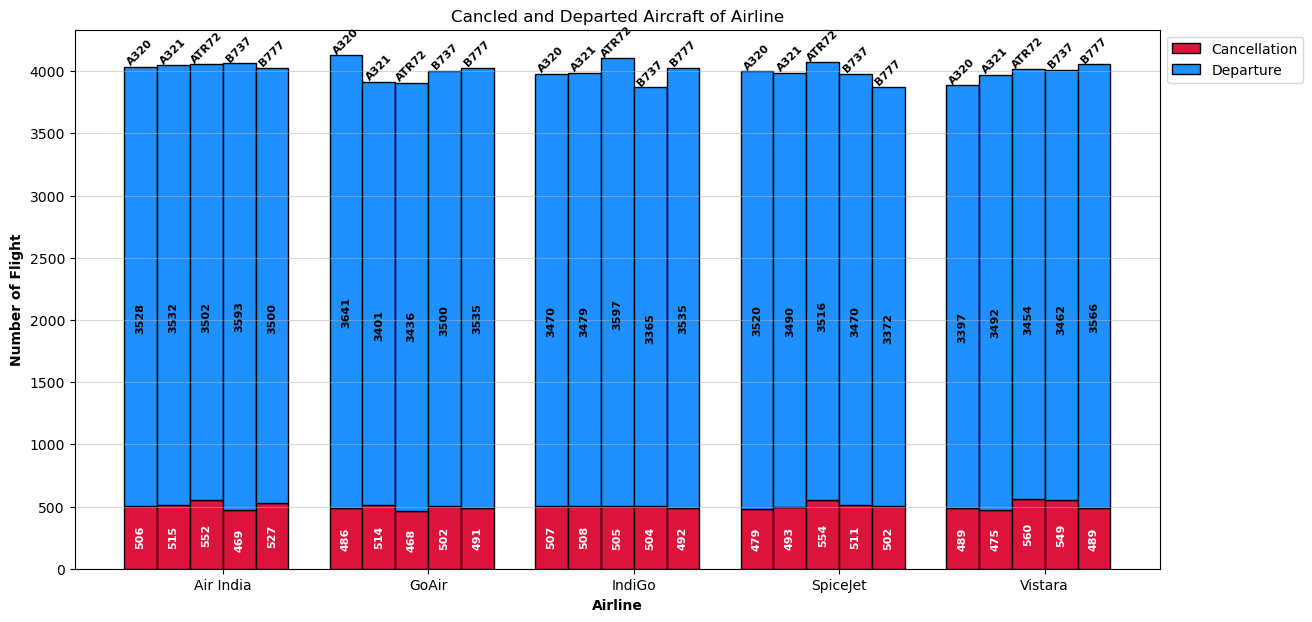

In [ ]:
#Stacked Clusterd Bar Graph
ua= dfp["Airline"].unique().tolist()          
fig,ax=plt.subplots(figsize=(14,7))                      
x_v=np.arange(len(ua))                  #len of airline                      
xw=0.8                                  #width
for i,j in enumerate(ua):
  sub=dfp[dfp["Airline"]==j].reset_index(drop=True)              #Reset index of all
  fc=len(sub)                                                    #fc length of sub which is 5 flights in airline
  bw=xw/fc                                                      # bar width of 5
  start=x_v[i]-xw/2
  for k in range(fc):
    x=start+k*bw                                               
    can=sub.loc[k,"Cancellations"]                                  #Loc of index and cancellation
    dep=sub.loc[k,"Departure"]
    rec1=plt.bar(x,can,bw,label="Cancellation" if (i==0 and k==0) else None,color="crimson" , edgecolor="black",linewidth=1)
    rec2=plt.bar(x,dep,bw,bottom=can,label="Departure" if (i==0 and k==0) else None,color="dodgerblue" , edgecolor="black",linewidth=1)
    ax.text(x,can+dep,sub.loc[k,"Flight"],ha="center",va="bottom",fontsize=8,rotation=45,weight ="bold",color="black")
    if can>0:
      ax.text(x,can/2,str(can),ha="center",va="center",fontsize=8,rotation=90,fontweight="bold",color="white")
    if dep>0:
      ax.text(x,(can+dep)/2,str(dep),ha="center",va="center",fontsize=8,rotation=90,fontweight="bold",color="black")
      
    
ax.set_xticks(x_v)
ax.set_xticklabels(ua)
ax.set_xlabel("Airline",weight="bold")
ax.set_ylabel("Number of Flight",weight="bold")
ax.set_title("Cancled and Departed Aircraft of Airline")
ax.legend(loc="upper left",bbox_to_anchor=(1,1))  
ax.grid(axis="y",alpha=0.5)     
plt.show()

In [ ]:
org_at

{'Air India': {'B777': {'AMD': 500,
   'BLR': 488,
   'BOM': 533,
   'CCU': 504,
   'DEL': 511,
   'HYD': 515,
   'MAA': 488,
   'PNQ': 488},
  'ATR72': {'AMD': 528,
   'BLR': 463,
   'BOM': 499,
   'CCU': 531,
   'DEL': 481,
   'HYD': 553,
   'MAA': 474,
   'PNQ': 525},
  'A320': {'AMD': 531,
   'BLR': 530,
   'BOM': 473,
   'CCU': 488,
   'DEL': 512,
   'HYD': 482,
   'MAA': 500,
   'PNQ': 518},
  'B737': {'AMD': 492,
   'BLR': 506,
   'BOM': 498,
   'CCU': 545,
   'DEL': 513,
   'HYD': 517,
   'MAA': 486,
   'PNQ': 505},
  'A321': {'AMD': 457,
   'BLR': 480,
   'BOM': 535,
   'CCU': 526,
   'DEL': 509,
   'HYD': 490,
   'MAA': 552,
   'PNQ': 498}},
 'GoAir': {'B737': {'AMD': 535,
   'BLR': 488,
   'BOM': 513,
   'CCU': 478,
   'DEL': 468,
   'HYD': 487,
   'MAA': 535,
   'PNQ': 498},
  'ATR72': {'AMD': 459,
   'BLR': 493,
   'BOM': 485,
   'CCU': 478,
   'DEL': 493,
   'HYD': 490,
   'MAA': 482,
   'PNQ': 524},
  'A320': {'AMD': 543,
   'BLR': 533,
   'BOM': 527,
   'CCU': 500,
   '

In [ ]:
dest_at

{'Air India': {'B777': {'AMD': 542,
   'BLR': 512,
   'BOM': 462,
   'CCU': 528,
   'DEL': 488,
   'HYD': 497,
   'MAA': 482,
   'PNQ': 516},
  'ATR72': {'AMD': 499,
   'BLR': 487,
   'BOM': 484,
   'CCU': 528,
   'DEL': 522,
   'HYD': 510,
   'MAA': 496,
   'PNQ': 528},
  'A320': {'AMD': 535,
   'BLR': 500,
   'BOM': 487,
   'CCU': 524,
   'DEL': 482,
   'HYD': 516,
   'MAA': 491,
   'PNQ': 499},
  'B737': {'AMD': 554,
   'BLR': 500,
   'BOM': 490,
   'CCU': 530,
   'DEL': 475,
   'HYD': 490,
   'MAA': 523,
   'PNQ': 500},
  'A321': {'AMD': 541,
   'BLR': 495,
   'BOM': 491,
   'CCU': 510,
   'DEL': 477,
   'HYD': 497,
   'MAA': 525,
   'PNQ': 511}},
 'GoAir': {'B737': {'AMD': 479,
   'BLR': 494,
   'BOM': 521,
   'CCU': 500,
   'DEL': 502,
   'HYD': 513,
   'MAA': 500,
   'PNQ': 493},
  'ATR72': {'AMD': 509,
   'BLR': 484,
   'BOM': 484,
   'CCU': 461,
   'DEL': 504,
   'HYD': 494,
   'MAA': 483,
   'PNQ': 485},
  'A320': {'AMD': 515,
   'BLR': 500,
   'BOM': 529,
   'CCU': 534,
   '

In [ ]:
rows = []
for airline, ac_dict in org_at.items():
    for ac_type, origin_dict in ac_dict.items():
        for origin, cnt in origin_dict.items():
            rows.append({
                "Airline": airline,
                "Aircraft_Type": ac_type,
                "Origin": origin,
                "Count": cnt
            })

dfa = pd.DataFrame(rows)
dfa

,Airline,Aircraft_Type,Origin,Count
0,Air India,B777,AMD,500
1,Air India,B777,BLR,488
2,Air India,B777,BOM,533
3,Air India,B777,CCU,504
4,Air India,B777,DEL,511
...,...,...,...,...
195,Vistara,ATR72,CCU,490
196,Vistara,ATR72,DEL,494
197,Vistara,ATR72,HYD,490
198,Vistara,ATR72,MAA,501


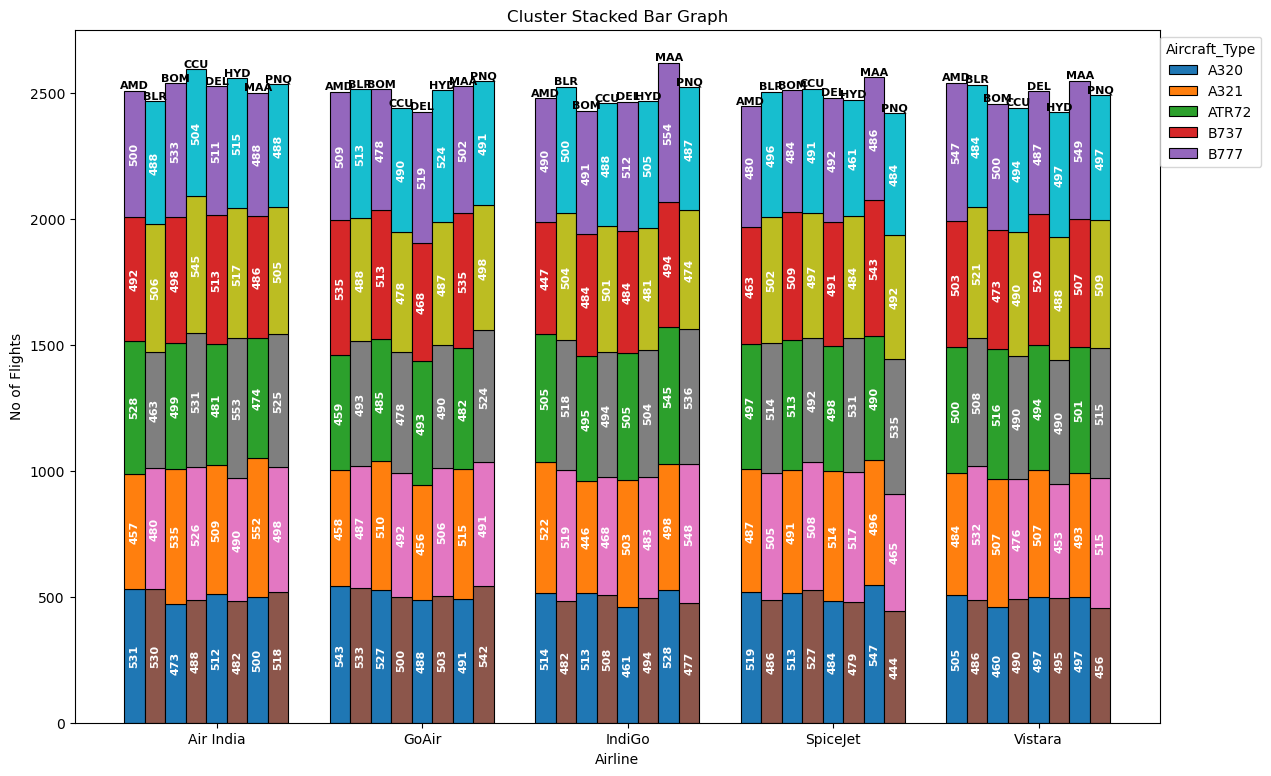

In [ ]:
airlines= dfa["Airline"].unique()
origins=sorted(dfa["Origin"].unique())
ac_types= sorted(dfa["Aircraft_Type"].unique())

fig,ax= plt.subplots(figsize=(14,9))

x_clusters=np.arange(len(airlines))
cluster_width=0.8

for i,airline in enumerate(airlines):
  sub =dfa[dfa["Airline"]==airline]
  piv=sub.pivot_table(
    index="Origin",
    columns="Aircraft_Type",
    values="Count",
    aggfunc="sum",
    fill_value=0
  ).reindex(index=origins, columns=ac_types, fill_value=0)
  
  bar_width= cluster_width /len(origins)
  start= x_clusters[i] - cluster_width / 2
  
  max_height=0                                   # track max heiht per stacked bar for labeliing aircraft types
  
  for j,origin in enumerate(origins):
    x=start + j * bar_width
    bottom =0 
    for ac in ac_types:
      val = piv.loc[origin, ac]
      if val == 0:
        continue
      
      bar =ax.bar(
        x,
        val,
        bar_width,
        bottom=bottom,
        edgecolor="black",
        linewidth=0.8,
        label=ac if (i==0 and j==0) else None
      )
      
      #Count label centered in each bar
  
      ax.text(x,bottom+val/2,str(val),ha="center",va="center",fontsize=8,color="white",weight="bold", rotation=90)
      bottom+=val
    if bottom > max_height:
      max_height=bottom  
      
    ax.text(x,bottom+0.5,origin,ha="center",va="bottom",fontsize=8,color="black",fontweight="bold")
      
ax.set_xticks(x_clusters)
ax.set_xticklabels(airlines)
ax.set_title("Cluster Stacked Bar Graph")

ax.set_xlabel("Airline")
ax.set_ylabel("No of Flights")
ax.legend(title="Aircraft_Type",loc="upper right",bbox_to_anchor=(1.1,1))
plt.show()
  
  
  
  
  

In [114]:
dest_at

{'Air India': {'B777': {'AMD': 542,
   'BLR': 512,
   'BOM': 462,
   'CCU': 528,
   'DEL': 488,
   'HYD': 497,
   'MAA': 482,
   'PNQ': 516},
  'ATR72': {'AMD': 499,
   'BLR': 487,
   'BOM': 484,
   'CCU': 528,
   'DEL': 522,
   'HYD': 510,
   'MAA': 496,
   'PNQ': 528},
  'A320': {'AMD': 535,
   'BLR': 500,
   'BOM': 487,
   'CCU': 524,
   'DEL': 482,
   'HYD': 516,
   'MAA': 491,
   'PNQ': 499},
  'B737': {'AMD': 554,
   'BLR': 500,
   'BOM': 490,
   'CCU': 530,
   'DEL': 475,
   'HYD': 490,
   'MAA': 523,
   'PNQ': 500},
  'A321': {'AMD': 541,
   'BLR': 495,
   'BOM': 491,
   'CCU': 510,
   'DEL': 477,
   'HYD': 497,
   'MAA': 525,
   'PNQ': 511}},
 'GoAir': {'B737': {'AMD': 479,
   'BLR': 494,
   'BOM': 521,
   'CCU': 500,
   'DEL': 502,
   'HYD': 513,
   'MAA': 500,
   'PNQ': 493},
  'ATR72': {'AMD': 509,
   'BLR': 484,
   'BOM': 484,
   'CCU': 461,
   'DEL': 504,
   'HYD': 494,
   'MAA': 483,
   'PNQ': 485},
  'A320': {'AMD': 515,
   'BLR': 500,
   'BOM': 529,
   'CCU': 534,
   '

In [145]:
columns = []

for airline, ac_dict in dest_at.items():
    for ac_type, dest_at_dict in ac_dict.items():
        for destination, cnt in dest_at_dict.items():
            columns.append({
                "Airline": airline,
                "Aircraft_Type": ac_type,
                "Destination": destination,
                "Count": cnt
            })

dfa = pd.DataFrame(columns)
dfa


,Airline,Aircraft_Type,Destination,Count
0,Air India,B777,AMD,542
1,Air India,B777,BLR,512
2,Air India,B777,BOM,462
3,Air India,B777,CCU,528
4,Air India,B777,DEL,488
...,...,...,...,...
195,Vistara,ATR72,CCU,480
196,Vistara,ATR72,DEL,517
197,Vistara,ATR72,HYD,530
198,Vistara,ATR72,MAA,493


In [137]:
print(dfa.columns)


Index(['Airline', 'Aircraft_Type', 'Destinaton', 'Count'], dtype='object')


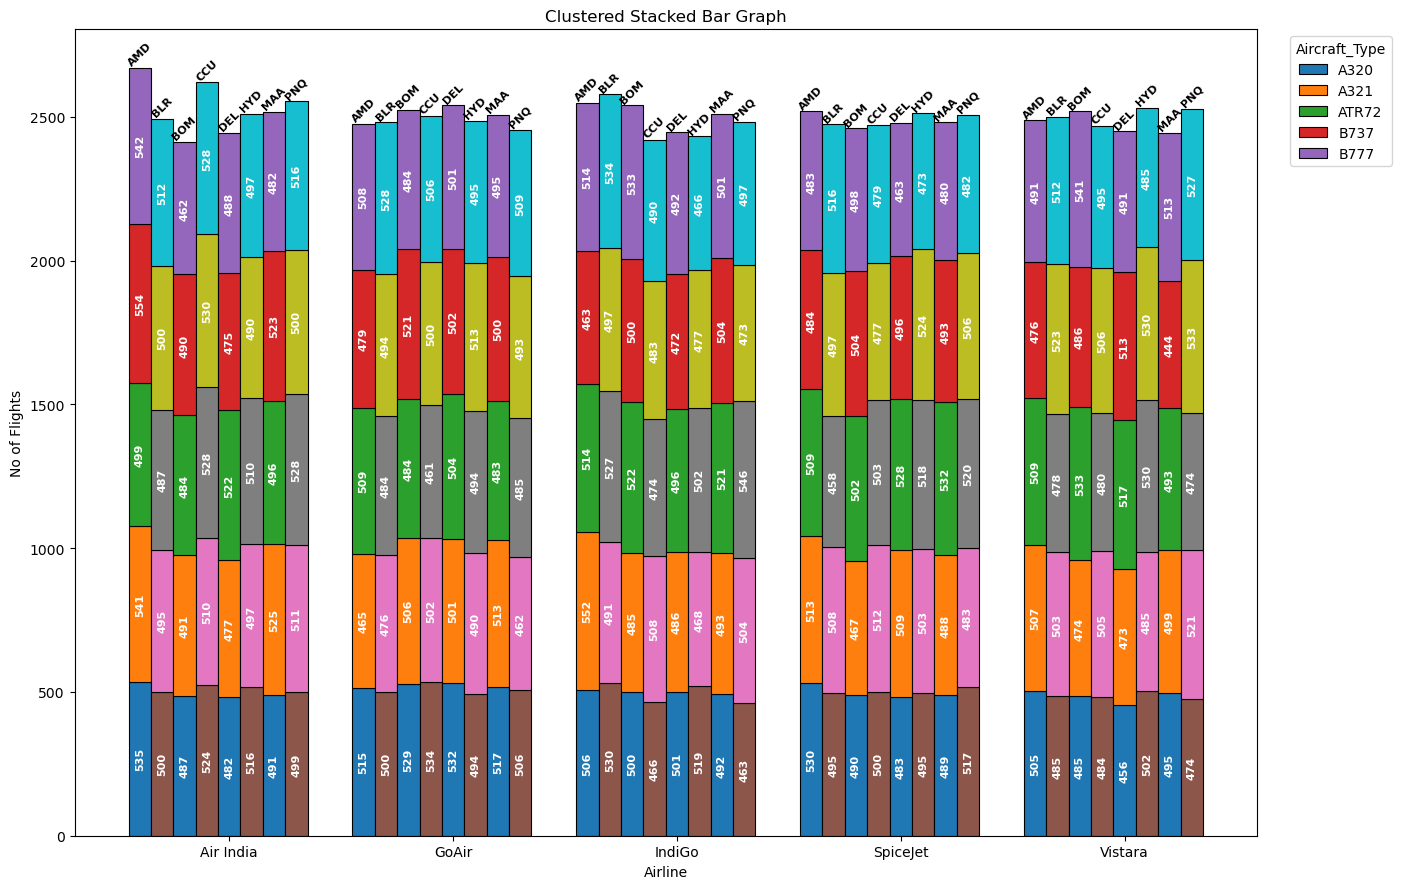

In [151]:
airlines = dfa["Airline"].unique()
Destinations = sorted(dfa["Destination"].unique())
ac_types = sorted(dfa["Aircraft_Type"].unique())

fig, ax = plt.subplots(figsize=(14,9))

x_clusters = np.arange(len(airlines))
cluster_width = 0.8

for i, airline in enumerate(airlines):
    sub = dfa[dfa["Airline"] == airline]

    piv = sub.pivot_table(
        index="Destination",
        columns="Aircraft_Type",
        values="Count",
        aggfunc="sum",
        fill_value=0
    ).reindex(index=Destinations, columns=ac_types, fill_value=0)

    bar_width = cluster_width / len(Destinations)
    start = x_clusters[i] - cluster_width / 2

    for j, destination in enumerate(Destinations):
        x = start + j * bar_width
        bottom = 0

        for ac in ac_types:
            val = piv.loc[destination, ac]
            if val == 0:
                continue

            ax.bar(
                x,
                val,
                bar_width,
                bottom=bottom,
                edgecolor="black",
                linewidth=0.8,
                label=ac if (i == 0 and j == 0) else None
            )

            ax.text(
                x, bottom + val/2, str(val),
                ha="center", va="center",
                fontsize=8, color="white",
                fontweight="bold", rotation=90
            )

            bottom += val

        ax.text(
            x, bottom + 0.5, destination,
            ha="center", va="bottom",
            fontsize=8, color="black",
            fontweight="bold",rotation=45
        )

ax.set_xticks(x_clusters)
ax.set_xticklabels(airlines)
ax.set_title("Clustered Stacked Bar Graph")

ax.set_xlabel("Airline")
ax.set_ylabel("No of Flights")
ax.legend(title="Aircraft_Type", loc="upper right", bbox_to_anchor=(1.12,1))
plt.tight_layout()
plt.show()


In [133]:
dest_at

{'Air India': {'B777': {'AMD': 542,
   'BLR': 512,
   'BOM': 462,
   'CCU': 528,
   'DEL': 488,
   'HYD': 497,
   'MAA': 482,
   'PNQ': 516},
  'ATR72': {'AMD': 499,
   'BLR': 487,
   'BOM': 484,
   'CCU': 528,
   'DEL': 522,
   'HYD': 510,
   'MAA': 496,
   'PNQ': 528},
  'A320': {'AMD': 535,
   'BLR': 500,
   'BOM': 487,
   'CCU': 524,
   'DEL': 482,
   'HYD': 516,
   'MAA': 491,
   'PNQ': 499},
  'B737': {'AMD': 554,
   'BLR': 500,
   'BOM': 490,
   'CCU': 530,
   'DEL': 475,
   'HYD': 490,
   'MAA': 523,
   'PNQ': 500},
  'A321': {'AMD': 541,
   'BLR': 495,
   'BOM': 491,
   'CCU': 510,
   'DEL': 477,
   'HYD': 497,
   'MAA': 525,
   'PNQ': 511}},
 'GoAir': {'B737': {'AMD': 479,
   'BLR': 494,
   'BOM': 521,
   'CCU': 500,
   'DEL': 502,
   'HYD': 513,
   'MAA': 500,
   'PNQ': 493},
  'ATR72': {'AMD': 509,
   'BLR': 484,
   'BOM': 484,
   'CCU': 461,
   'DEL': 504,
   'HYD': 494,
   'MAA': 483,
   'PNQ': 485},
  'A320': {'AMD': 515,
   'BLR': 500,
   'BOM': 529,
   'CCU': 534,
   '

In [152]:
piv

Aircraft_Type,A320,A321,ATR72,B737,B777
Destination,,,,,
AMD,505,507,509,476,491
BLR,485,503,478,523,512
BOM,485,474,533,486,541
CCU,484,505,480,506,495
DEL,456,473,517,513,491
HYD,502,485,530,530,485
MAA,495,499,493,444,513
PNQ,474,521,474,533,527
